# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand falls-windsor
Processing Record 2 of Set 1 | vangaindrano
Processing Record 3 of Set 1 | mayen abun
City not found. Skipping...
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | suai
City not found. Skipping...
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | quiindy
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | mel'nikovo
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | guerrero n

Processing Record 36 of Set 4 | sumbawa besar
Processing Record 37 of Set 4 | bel ombre
Processing Record 38 of Set 4 | hanceville
Processing Record 39 of Set 4 | inhambane
Processing Record 40 of Set 4 | brandon
Processing Record 41 of Set 4 | kaoma
Processing Record 42 of Set 4 | inari
Processing Record 43 of Set 4 | porto seguro
Processing Record 44 of Set 4 | worland
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | ilebo
Processing Record 47 of Set 4 | namibe
Processing Record 48 of Set 4 | timbiras
Processing Record 49 of Set 4 | nishinoomote
Processing Record 0 of Set 5 | el granada
Processing Record 1 of Set 5 | san juan
Processing Record 2 of Set 5 | alotau
City not found. Skipping...
Processing Record 3 of Set 5 | slave lake
Processing Record 4 of Set 5 | tsetserleg
Processing Record 5 of Set 5 | novaya ladoga
Processing Record 6 of Set 5 | kauhajoki
Processing Record 7 of Set 5 | novotroitsk
Processing Record 8 of Set 5 | luderitz
Processing Record 

Processing Record 30 of Set 8 | nanpiao
Processing Record 31 of Set 8 | fort st. john
Processing Record 32 of Set 8 | cavelossim
Processing Record 33 of Set 8 | tataouine
Processing Record 34 of Set 8 | lib
Processing Record 35 of Set 8 | puerto deseado
Processing Record 36 of Set 8 | wangaratta
Processing Record 37 of Set 8 | neryungri
Processing Record 38 of Set 8 | akureyri
Processing Record 39 of Set 8 | mutsu
Processing Record 40 of Set 8 | tete
Processing Record 41 of Set 8 | nchelenge
Processing Record 42 of Set 8 | mamuju
Processing Record 43 of Set 8 | redencao
Processing Record 44 of Set 8 | la paz
Processing Record 45 of Set 8 | queenstown
Processing Record 46 of Set 8 | burhar
Processing Record 47 of Set 8 | candido mendes
Processing Record 48 of Set 8 | mazagao
Processing Record 49 of Set 8 | laja
Processing Record 0 of Set 9 | hilo
Processing Record 1 of Set 9 | whakatane
Processing Record 2 of Set 9 | georgetown
Processing Record 3 of Set 9 | sal rei
Processing Record 4 

Processing Record 22 of Set 12 | hasaki
Processing Record 23 of Set 12 | verkhnevilyuysk
Processing Record 24 of Set 12 | san luis
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | camana
Processing Record 27 of Set 12 | nyala
Processing Record 28 of Set 12 | mossel bay
Processing Record 29 of Set 12 | nelidovo
Processing Record 30 of Set 12 | horta
Processing Record 31 of Set 12 | axim
Processing Record 32 of Set 12 | evinayong
Processing Record 33 of Set 12 | vengerovo
Processing Record 34 of Set 12 | nieuw amsterdam
Processing Record 35 of Set 12 | hastings
Processing Record 36 of Set 12 | cariamanga
Processing Record 37 of Set 12 | zheshart
Processing Record 38 of Set 12 | riosucio
Processing Record 39 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 40 of Set 12 | piedade
Processing Record 41 of Set 12 | paranhos
Processing Record 42 of Set 12 | walvis bay
Processing Record 43 of Set 12 | taguatinga
Processing Record 44 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grand falls-windsor,48.9332,-55.6649,11.95,94,100,5.36,CA,1700369832
1,vangaindrano,-23.3500,47.6000,25.07,77,93,3.84,MG,1700369832
2,wailua homesteads,22.0669,-159.3780,25.24,86,89,0.89,US,1700369833
3,grytviken,-54.2811,-36.5092,1.09,98,100,1.89,GS,1700369761
4,ushuaia,-54.8000,-68.3000,0.81,75,75,9.77,AR,1700369833


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grand falls-windsor,48.9332,-55.6649,11.95,94,100,5.36,CA,1700369832
1,vangaindrano,-23.3500,47.6000,25.07,77,93,3.84,MG,1700369832
2,wailua homesteads,22.0669,-159.3780,25.24,86,89,0.89,US,1700369833
3,grytviken,-54.2811,-36.5092,1.09,98,100,1.89,GS,1700369761
4,ushuaia,-54.8000,-68.3000,0.81,75,75,9.77,AR,1700369833


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

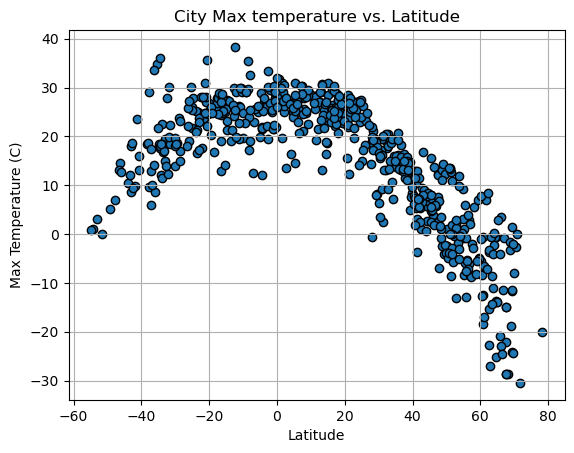

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

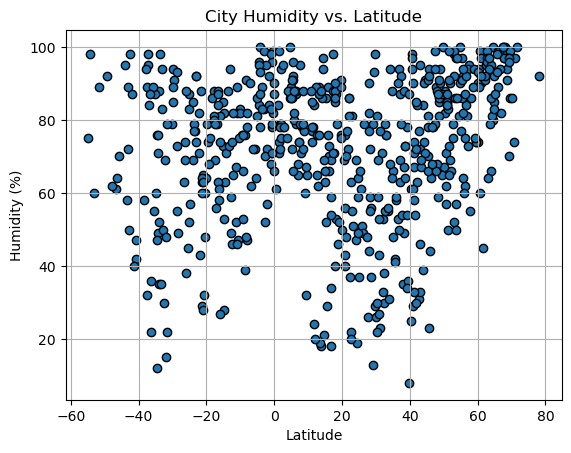

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

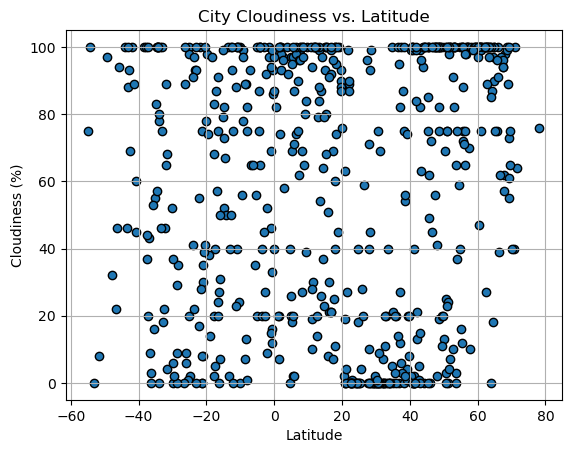

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

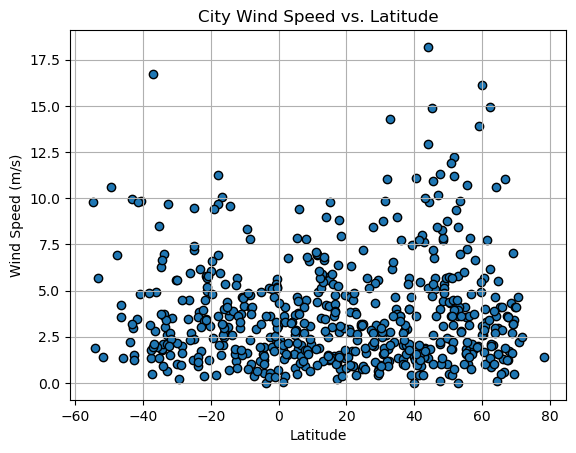

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def calc_linear_regression(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0, 0), fontsize=15,color="red")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grand falls-windsor,48.9332,-55.6649,11.95,94,100,5.36,CA,1700369832
2,wailua homesteads,22.0669,-159.3780,25.24,86,89,0.89,US,1700369833
6,bethel,41.3712,-73.4140,3.05,71,0,0.45,US,1700369834
7,dudinka,69.4058,86.1778,-24.10,99,55,3.40,RU,1700369835
9,bilibino,68.0546,166.4372,-28.71,100,98,1.73,RU,1700369836


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vangaindrano,-23.3500,47.6000,25.07,77,93,3.84,MG,1700369832
3,grytviken,-54.2811,-36.5092,1.09,98,100,1.89,GS,1700369761
4,ushuaia,-54.8000,-68.3000,0.81,75,75,9.77,AR,1700369833
5,adamstown,-25.0660,-130.1015,21.80,87,100,9.46,PN,1700369834
8,hithadhoo,-0.6000,73.0833,27.94,78,16,5.64,MV,1700369835


###  Temperature vs. Latitude Linear Regression Plot

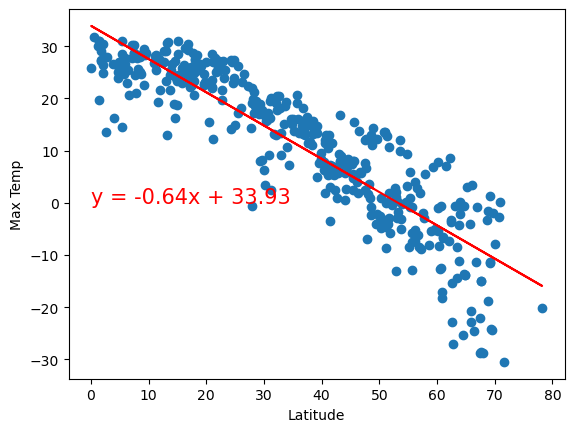

In [15]:
# Linear regression on Northern Hemisphere
calc_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp')

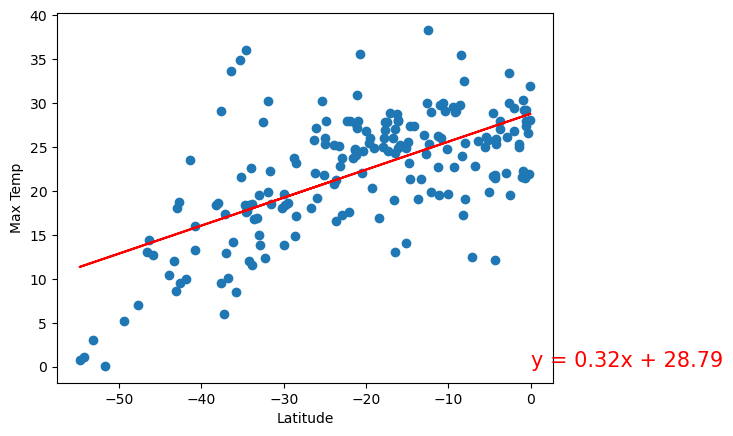

In [16]:
# Linear regression on Southern Hemisphere
calc_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp')

**Discussion about the linear relationship:** The scatter plot verifies that max temperature is at the equator. As we go towards north pole or south pole temperature decreases.The temperature at north pole is below 0 indicating that it is winter at north pole. The south pole temperature indicates summer at south pole.

### Humidity vs. Latitude Linear Regression Plot

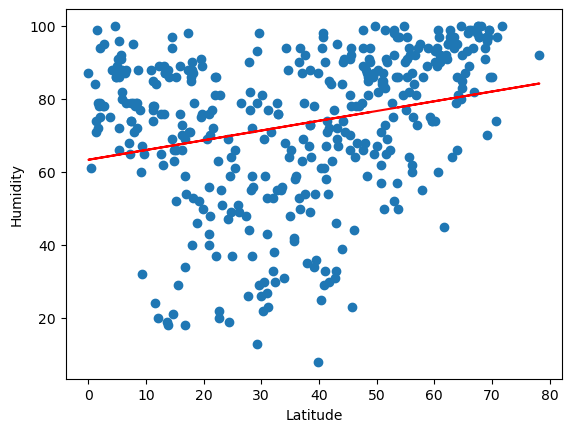

In [17]:
# Northern Hemisphere
calc_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity')

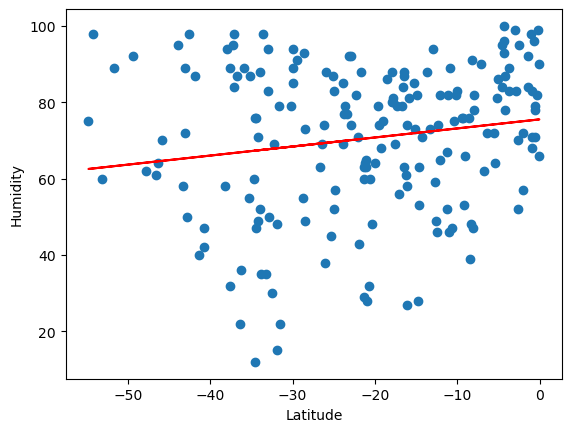

In [18]:
# Southern Hemisphere
calc_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity')

**Discussion about the linear relationship:** The humidity in northern hemisphere is maximum around tropic of cancer. This corresponds with the tropical weather areas in the northern hemisphere. In southern hemisphere land masses are less compared to north hemisphere. In sourthen hemisphere the high humidity is spread over wider area.

### Cloudiness vs. Latitude Linear Regression Plot

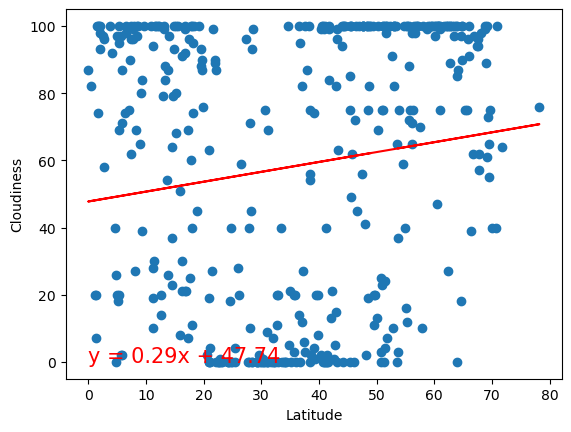

In [19]:
# Northern Hemisphere
calc_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness')

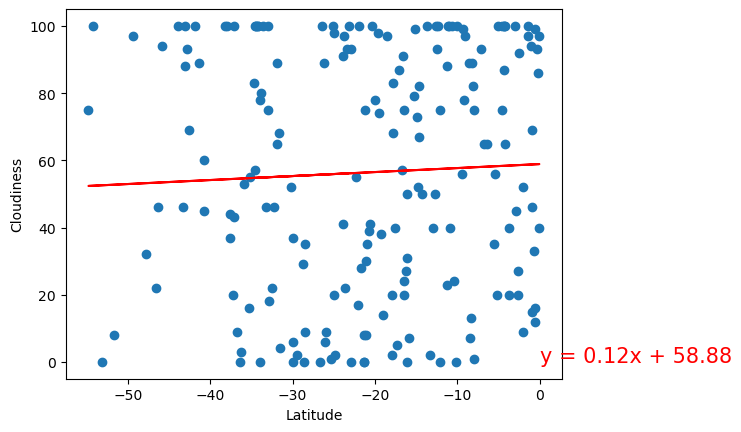

In [20]:
# Southern Hemisphere
calc_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness')

**Discussion about the linear relationship:** From the scattered plot there seems less correlation between cloudiness and latitude. This indicates that cloudiness depends on other factors such as local topography

### Wind Speed vs. Latitude Linear Regression Plot

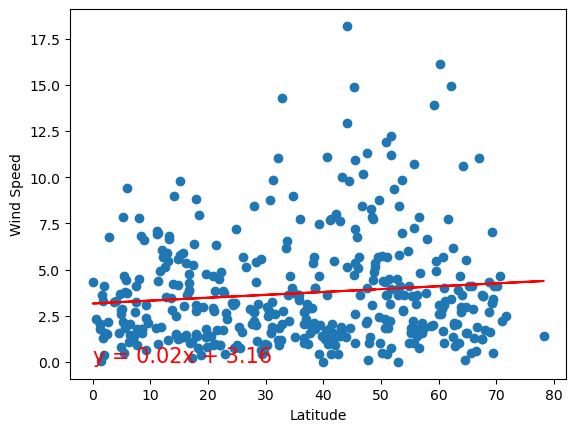

In [21]:
# Northern Hemisphere
calc_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed')

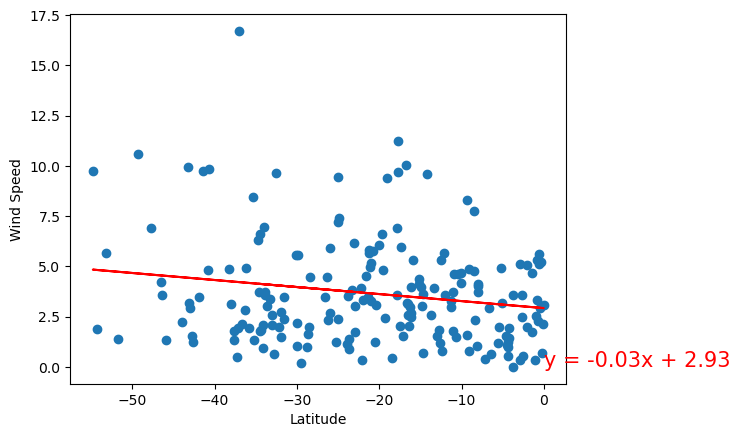

In [22]:
# Southern Hemisphere
calc_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed')

**Discussion about the linear relationship:** As the latitude increases in northern hemisphere, the range of wind speed increases. There are quite a few cities which have low wind speed even at higher latitude. But the variation in wind speed at higher latitude is more. In southern hemisphere as the latitude decreases the variation the wind speed increases. 